<img src="https://i.imgur.com/6U6q5jQ.png"/>

# Mining Networks

We have networks available. Let's get some information out of them.

This is the data about peru

<img src="https://github.com/EvansDataScience/govanalyticsweb/raw/master/pics/elites.png" width="900">

In that paper, the researcher builds a matrix of relationships like this:

<img src="https://github.com/EvansDataScience/govanalyticsweb/raw/master/pics/figuematrix.png" width="900">


The rows and columns are the same values, and they represent the surnames of the board members of the most important companies in Peru. So, each black cell is informning you if they are sitting together in the board of any of these companies. The author selected the 39 most important firms in the country.

<a id='part1'></a>
## 1. Importing Data

The data was not available from the author's website, so the matrix you see above was copied and pasted to Excel. It looks like this:

<img src="https://github.com/EvansDataScience/govanalyticsweb/raw/master/pics/excelFigue.png" width="1000">

The format of that data is an adjancey matrix, and the link to that file is here (I saved it as a csv file):

In [1]:
linkAdjMx='https://github.com/EvansDataScience/data/raw/master/dataFigueroa.csv'

We can the link to read this CSV file via Pandas:

In [2]:
# Getting the matrix (edges):
import pandas

# column 1 will be used as row name: index_col=0
EdgesAsDF = pandas.read_csv(linkAdjMx, index_col=0) 

This matrix is supposed to be squared. Is it?

In [3]:
EdgesAsDF.shape

(37, 38)

The last column is information about the businessmen: if they represented international corporations:

In [4]:
EdgesAsDF['Multinacional']

Names
Romero                 1
Grana                  1
Miro Quesada           1
Moreyra                1
Fort                   1
De La Puente           1
Wiese                  1
Onrubia                1
Brescia                1
Nicolini               1
Montero                1
Picaso                 1
Bentin                 1
Benavides              1
Bustamante             1
Woodman Pollit         1
Raffo                  1
Piazza                 1
Berckemeyer            0
Llosa Barber           1
Beoutis Ledesma        1
Rizo Patron            1
Montori                1
Sotomayor              1
Cilloniz               1
Ferreyros              0
Michell                0
Wong Lu                1
Batievsky Spack        1
Matos Escalada         1
Galsky                 0
Lucioni                0
Rodriguez Rodriguez    1
Custer                 0
Ikeda                  0
Cogorno                0
Arias Davila           1
Name: Multinacional, dtype: int64

The adjacency matrix needs not to include the  column ("Multinacional") in the data frame:

In [5]:
varsToDrop=['Multinacional']
adjacency=EdgesAsDF.drop(varsToDrop,axis=1) 

#result
adjacency

,Romero,Grana,Miro Quesada,Moreyra,Fort,De La Puente,Wiese,Onrubia,Brescia,Nicolini,...,Wong Lu,Batievsky Spack,Matos Escalada,Galsky,Lucioni,Rodriguez Rodriguez,Custer,Ikeda,Cogorno,Arias Davila
Names,,,,,,,,,,,,,,,,,,,,,
Romero,0,1,1,1,1,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
Grana,1,0,1,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Miro Quesada,1,1,0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Moreyra,1,0,0,0,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
Fort,1,1,1,1,0,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
De La Puente,1,1,1,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Wiese,0,1,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Onrubia,1,0,0,1,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
Brescia,1,0,0,1,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


A pandas data frame like this (the adjacency matrix) can be converted directly into a network via **networkx**:

In [6]:
import networkx as net

EliteNet = net.Graph(adjacency) 

A network is composed of _nodes_ and _edges_ that connect them. You can know how many you have of each like this:

In [7]:
# number of edges:
EliteNet.size()

135

In [8]:
# number of  nodes:
len(EliteNet)

37

You can take a look at how this network looks like:

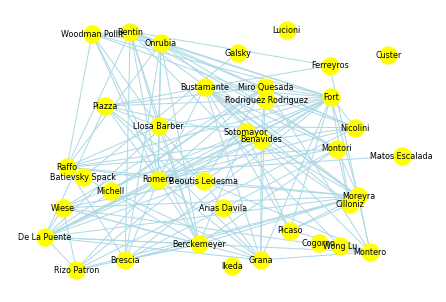

In [9]:
%matplotlib inline

net.draw_random(EliteNet,
                node_color='yellow',
                edge_color='lightblue',
                with_labels=True,
                font_size=8)

Remember we had an attribute we dropped, but now it is time to use it.

In [10]:
# The adjacency matrix did not include the nodes attributes.
EdgesAsDF['Multinacional'].head()

Names
Romero          1
Grana           1
Miro Quesada    1
Moreyra         1
Fort            1
Name: Multinacional, dtype: int64

So the network does not have that information:

In [11]:
EliteNet.nodes(data=True)

NodeDataView({'Romero': {}, 'Grana': {}, 'Miro Quesada': {}, 'Moreyra': {}, 'Fort': {}, 'De La Puente': {}, 'Wiese': {}, 'Onrubia': {}, 'Brescia': {}, 'Nicolini': {}, 'Montero': {}, 'Picaso': {}, 'Bentin': {}, 'Benavides': {}, 'Bustamante': {}, 'Woodman Pollit': {}, 'Raffo': {}, 'Piazza': {}, 'Berckemeyer': {}, 'Llosa Barber': {}, 'Beoutis Ledesma': {}, 'Rizo Patron': {}, 'Montori': {}, 'Sotomayor': {}, 'Cilloniz': {}, 'Ferreyros': {}, 'Michell': {}, 'Wong Lu': {}, 'Batievsky Spack': {}, 'Matos Escalada': {}, 'Galsky': {}, 'Lucioni': {}, 'Rodriguez Rodriguez': {}, 'Custer': {}, 'Ikeda': {}, 'Cogorno': {}, 'Arias Davila': {}})

Networkx has the function **set_node_attributes** to take care of that, but needs that we prepare the attribute as a **mapping** using a dict. So, let's **zip** them into a dict:

In [12]:
dict(zip(EdgesAsDF.index,EdgesAsDF['Multinacional']))

{'Romero': 1,
 'Grana': 1,
 'Miro Quesada': 1,
 'Moreyra': 1,
 'Fort': 1,
 'De La Puente': 1,
 'Wiese': 1,
 'Onrubia': 1,
 'Brescia': 1,
 'Nicolini': 1,
 'Montero': 1,
 'Picaso': 1,
 'Bentin': 1,
 'Benavides': 1,
 'Bustamante': 1,
 'Woodman Pollit': 1,
 'Raffo': 1,
 'Piazza': 1,
 'Berckemeyer': 0,
 'Llosa Barber': 1,
 'Beoutis Ledesma': 1,
 'Rizo Patron': 1,
 'Montori': 1,
 'Sotomayor': 1,
 'Cilloniz': 1,
 'Ferreyros': 0,
 'Michell': 0,
 'Wong Lu': 1,
 'Batievsky Spack': 1,
 'Matos Escalada': 1,
 'Galsky': 0,
 'Lucioni': 0,
 'Rodriguez Rodriguez': 1,
 'Custer': 0,
 'Ikeda': 0,
 'Cogorno': 0,
 'Arias Davila': 1}

As this procedure worked well, let's save it into an object:

In [13]:
attributeToAdd=dict(zip(EdgesAsDF.index,EdgesAsDF['Multinacional']))

And proceed with the change:

In [14]:
net.set_node_attributes(EliteNet, attributeToAdd,'multi')

It should have worked:

In [15]:
EliteNet.nodes(data=True)

NodeDataView({'Romero': {'multi': 1}, 'Grana': {'multi': 1}, 'Miro Quesada': {'multi': 1}, 'Moreyra': {'multi': 1}, 'Fort': {'multi': 1}, 'De La Puente': {'multi': 1}, 'Wiese': {'multi': 1}, 'Onrubia': {'multi': 1}, 'Brescia': {'multi': 1}, 'Nicolini': {'multi': 1}, 'Montero': {'multi': 1}, 'Picaso': {'multi': 1}, 'Bentin': {'multi': 1}, 'Benavides': {'multi': 1}, 'Bustamante': {'multi': 1}, 'Woodman Pollit': {'multi': 1}, 'Raffo': {'multi': 1}, 'Piazza': {'multi': 1}, 'Berckemeyer': {'multi': 0}, 'Llosa Barber': {'multi': 1}, 'Beoutis Ledesma': {'multi': 1}, 'Rizo Patron': {'multi': 1}, 'Montori': {'multi': 1}, 'Sotomayor': {'multi': 1}, 'Cilloniz': {'multi': 1}, 'Ferreyros': {'multi': 0}, 'Michell': {'multi': 0}, 'Wong Lu': {'multi': 1}, 'Batievsky Spack': {'multi': 1}, 'Matos Escalada': {'multi': 1}, 'Galsky': {'multi': 0}, 'Lucioni': {'multi': 0}, 'Rodriguez Rodriguez': {'multi': 1}, 'Custer': {'multi': 0}, 'Ikeda': {'multi': 0}, 'Cogorno': {'multi': 0}, 'Arias Davila': {'multi': 1

Before going further, it is good to know if our network is connected. If not connected, it means there are sub groups that do not interact with each other:

In [16]:
net.is_connected(EliteNet)

False

So we have these people in components, how many?

In [17]:
numComponents=net.number_connected_components(EliteNet)
numComponents

8

What nodes are in each component?:

In [18]:
for c in net.connected_components(EliteNet):
    print (c, '\n')

{'Raffo', 'Grana', 'Bustamante', 'Romero', 'Llosa Barber', 'De La Puente', 'Piazza', 'Montero', 'Berckemeyer', 'Cilloniz', 'Bentin', 'Brescia', 'Benavides', 'Picaso', 'Onrubia', 'Woodman Pollit', 'Michell', 'Beoutis Ledesma', 'Wong Lu', 'Montori', 'Miro Quesada', 'Moreyra', 'Wiese', 'Ferreyros', 'Sotomayor', 'Fort', 'Rizo Patron', 'Nicolini'} 

{'Galsky', 'Batievsky Spack', 'Matos Escalada'} 

{'Lucioni'} 

{'Rodriguez Rodriguez'} 

{'Custer'} 

{'Ikeda'} 

{'Cogorno'} 

{'Arias Davila'} 



A visual representation follows:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

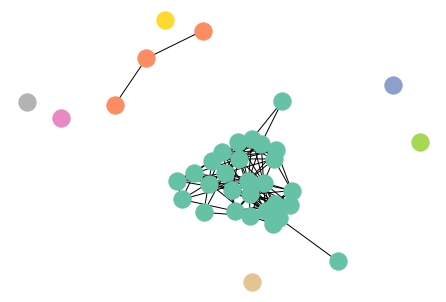

In [19]:
import matplotlib.pyplot as plt

colorsForComponents = plt.get_cmap('Set2',numComponents).colors

nodesPositions=net.spring_layout(EliteNet,k=0.5)
#ConnectedComponents = net.connected_component_subgraphs(EliteNet)
ConnectedComponents =(EliteNet.subgraph(c).copy() for c in net.connected_components(EliteNet))

for eachComponent,eachColor in zip(ConnectedComponents,colorsForComponents):
    net.draw(eachComponent,nodesPositions,node_color=eachColor)

As we do not have ONE connected network but several components, we can pay attention to the Giant Component:

In [20]:
#EliteNet_giant = max(net.connected_component_subgraphs(EliteNet), key=len)
Gcc = sorted(net.connected_components(EliteNet), key=len, reverse=True)
EliteNet_giant = EliteNet.subgraph(Gcc[0])

Let's take a look at the Giant Component:

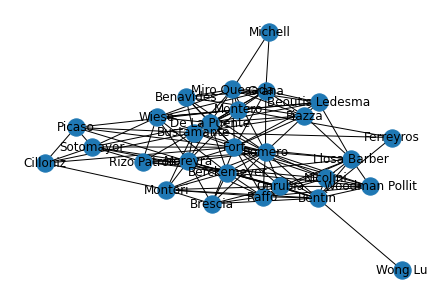

In [21]:
net.draw(EliteNet_giant,with_labels=True)

Basic summary:

In [22]:
# number of edges:
EliteNet_giant.size()

133

In [23]:
# number of  nodes:
len(EliteNet_giant)

28

We will use the giant component as our network to be explored.

____

<a id='part2'></a>

## 2. Exploring the NETWORK

<a id='part21'></a>

### Exploring the Network as a whole

* Density: from 0 to 1, where 1 makes it a 'complete' network: there is a link between every pair of nodes.


In [24]:
net.density(EliteNet_giant) 

0.35185185185185186

In [25]:
net.diameter(EliteNet_giant)

4

* Local clustering coefficient of a node is away to measure the level of connectivity its neighbors. If all its neighbors are connected among one another, if they are totally connected, you get 1; if none of them is connected you get zero. Then, the average clustering coefficient tells you the average of those values.


In [26]:
# count_zeros=False to make results compatible with R!
net.average_clustering(EliteNet_giant,count_zeros=False)

0.6537018696117423

In [27]:
# Shorter path (average)
# shows the average number of steps it takes to get from one node to another.

net.average_shortest_path_length(EliteNet_giant)

1.7407407407407407

**Random networks** have *small shortest path* and *small clustering coefficient*...Is this the case?. The high clustering coefficient would suggest a **small world**, as most nodes are not neighbors of one another, but most nodes can be reached from every other in few steps.

* Transitivity: How probable is that two business men with a common business friend, are also friends.

In [28]:
net.transitivity(EliteNet_giant)

0.5829694323144105

* Assortativity (degree): it is a measure to see if nodes are connecting to other nodes similar in degree.  Closer to 1 means higher assortativity, closer to -1 diassortativity; while 0 is no assortitivity.

In [29]:
net.degree_assortativity_coefficient(EliteNet_giant)

-0.12086710760602014

You can also compute assortativity using an attribute of interest:

In [30]:
net.attribute_assortativity_coefficient(EliteNet_giant,'multi')

-0.07258064516129017

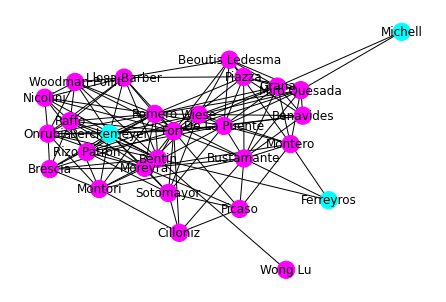

In [31]:
# coloring the nodes by attribute:
color_map = plt.get_cmap("cool")
valuesForColors=[n[1]['multi'] for n in EliteNet_giant.nodes(data=True)]
net.draw(EliteNet_giant,node_color=valuesForColors,cmap=color_map,with_labels=True)

<a id='part22'></a>

### Exploration of network communities

A **clique** can be understood a community of nodes where all of them are connected to one another.

* How many cliques can be found in this network?

In [32]:
len([a for a in net.enumerate_all_cliques(EliteNet_giant)])

1074

If a clique in the network can not be bigger is you add another node, then you have a **maximal clique**.

* How many maximal cliques are there in this network?

In [33]:
net.graph_number_of_cliques(EliteNet_giant)

28

This is how you see every maximal clique:

In [34]:
for a in net.find_cliques(EliteNet_giant):
    print (a)

['Wiese', 'De La Puente', 'Sotomayor', 'Moreyra', 'Rizo Patron', 'Berckemeyer']
['Wiese', 'De La Puente', 'Montero', 'Beoutis Ledesma', 'Grana', 'Miro Quesada']
['Wiese', 'De La Puente', 'Montero', 'Moreyra']
['Ferreyros', 'Bustamante', 'Montero']
['Ferreyros', 'Bentin']
['Michell', 'Grana', 'Miro Quesada']
['Fort', 'Cilloniz', 'Picaso', 'Sotomayor']
['Fort', 'Cilloniz', 'Picaso', 'Bustamante']
['Fort', 'Romero', 'Raffo', 'Bentin', 'Onrubia', 'Brescia', 'Moreyra']
['Fort', 'Romero', 'Raffo', 'Bentin', 'Onrubia', 'Llosa Barber', 'Woodman Pollit', 'Nicolini']
['Fort', 'Romero', 'Grana', 'Bustamante', 'De La Puente', 'Piazza', 'Benavides', 'Miro Quesada']
['Fort', 'Romero', 'Bustamante', 'Moreyra', 'De La Puente']
['Fort', 'Romero', 'Piazza', 'Llosa Barber']
['Fort', 'Picaso', 'Moreyra', 'Sotomayor']
['Fort', 'Picaso', 'Moreyra', 'Bustamante']
['Fort', 'Beoutis Ledesma', 'Piazza', 'Llosa Barber']
['Fort', 'Beoutis Ledesma', 'Piazza', 'Miro Quesada', 'Grana', 'De La Puente']
['Fort', 'Soto

You can find the size of the _maximum clique_, largest clique in the graph, like this:

In [35]:
net.graph_clique_number(EliteNet_giant)

8

You can see each maximum clique like this:

In [36]:
[c for c in net.find_cliques(EliteNet_giant) if len(c) == net.graph_clique_number(EliteNet_giant)]

[['Fort',
  'Romero',
  'Raffo',
  'Bentin',
  'Onrubia',
  'Llosa Barber',
  'Woodman Pollit',
  'Nicolini'],
 ['Fort',
  'Romero',
  'Grana',
  'Bustamante',
  'De La Puente',
  'Piazza',
  'Benavides',
  'Miro Quesada'],
 ['Berckemeyer',
  'Romero',
  'Raffo',
  'Bentin',
  'Onrubia',
  'Brescia',
  'Moreyra',
  'Montori']]

If a network presents cliques makes you suspect that there can be **communities**.

This is a huge field of research, let me me show you one of the algorithms known as the [_Louvain method_](https://perso.uclouvain.be/vincent.blondel/research/louvain.html).

This algorithm can be installed using **pip install python-louvain**, and import it using **community**.


In [38]:
import community 
parts = community.best_partition(EliteNet_giant)
parts

{'Romero': 0,
 'Grana': 2,
 'Miro Quesada': 2,
 'Moreyra': 0,
 'Fort': 1,
 'De La Puente': 2,
 'Wiese': 2,
 'Onrubia': 0,
 'Brescia': 0,
 'Nicolini': 0,
 'Montero': 2,
 'Picaso': 1,
 'Bentin': 0,
 'Benavides': 2,
 'Bustamante': 2,
 'Woodman Pollit': 0,
 'Raffo': 0,
 'Piazza': 2,
 'Berckemeyer': 0,
 'Llosa Barber': 0,
 'Beoutis Ledesma': 2,
 'Rizo Patron': 0,
 'Montori': 0,
 'Sotomayor': 1,
 'Cilloniz': 1,
 'Ferreyros': 2,
 'Michell': 2,
 'Wong Lu': 0}

You can add that value as an attribute:

In [39]:
net.set_node_attributes(EliteNet_giant, parts,'community')

Now plot this attribute:

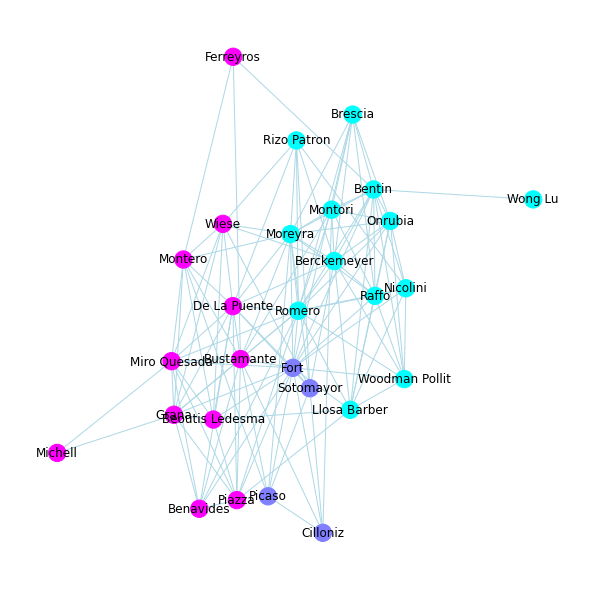

In [40]:
pos=net.spring_layout(EliteNet_giant, k=0.2) 
plt.figure(figsize=(8,8))
color_map = plt.get_cmap("cool")
valuesForColors=[n[1]['community'] for n in EliteNet_giant.nodes(data=True)]
net.draw(EliteNet_giant,node_color=valuesForColors,cmap=color_map,with_labels=True,edge_color='lightblue')

Let's turn our attention to the nodes and their roles in the network.

<a id='part23'></a>

### Exploration of network actors

In [41]:
# Computing centrality measures:
degr=net.degree_centrality(EliteNet_giant)  # based on connections count
clos=net.closeness_centrality(EliteNet_giant) # "speed" to access the rest
betw=net.betweenness_centrality(EliteNet_giant,normalized=True) # "control flow" among the network nodes
eige=net.eigenvector_centrality(EliteNet_giant) # central nodes connected to central nodes (influential?)

In [42]:
# measures into a data frame:
Centrality=[ [rich, degr[rich],clos[rich],betw[rich],eige[rich]] for rich in EliteNet_giant]
headers=['person','Degree','Closeness','Betweenness','Eigenvector']
DFCentrality=pandas.DataFrame(Centrality,columns=headers)
DFCentrality

,person,Degree,Closeness,Betweenness,Eigenvector
0,Romero,0.666667,0.750000,0.102156,0.327919
1,Grana,0.407407,0.613636,0.043353,0.185614
2,Miro Quesada,0.407407,0.613636,0.043353,0.185614
3,Moreyra,0.555556,0.675000,0.065573,0.271159
4,Fort,0.703704,0.771429,0.155165,0.321286
5,De La Puente,0.518519,0.658537,0.039053,0.246994
6,Wiese,0.333333,0.586957,0.017637,0.149863
7,Onrubia,0.407407,0.613636,0.006340,0.222147
8,Brescia,0.296296,0.574468,0.000747,0.178774
9,Nicolini,0.296296,0.562500,0.005603,0.162623


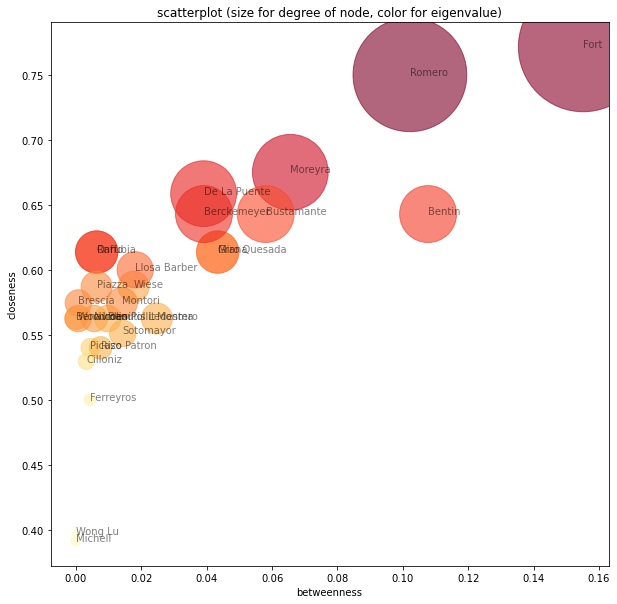

In [43]:
fig, ax = plt.subplots(figsize=(10,10))

ax.scatter(DFCentrality.Betweenness, DFCentrality.Closeness,s=(DFCentrality.Degree+1.3)**14,
           c=DFCentrality.Eigenvector,
           cmap=plt.get_cmap('YlOrRd'), alpha=0.6)

valsForAnnotate=zip(DFCentrality['person'],DFCentrality['Betweenness'],DFCentrality['Closeness'])
for name,coordX,coordY in valsForAnnotate:
    ax.annotate(name, (coordX,coordY),alpha=0.5)
    
plt.title("scatterplot (size for degree of node, color for eigenvalue)")
plt.xlabel("betweenness")
plt.ylabel("closeness")
plt.show()

The node with the highest degree could be considered a _hub_ in the network:

In [44]:
# degr is a dictionary:
max(degr.keys(), key=(lambda k: degr[k]))

# or you can try:
#DFCentrality['person'].loc[DFCentrality['Degree'].idxmax()]

'Fort'

We can plot the neighbors of the hub, _its ego network_:

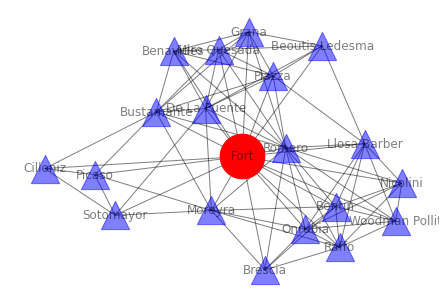

In [45]:
# Determine the hub name:
HubNode=max(degr.keys(), key=(lambda k: degr[k]))

# Get ego network of Hub
HubEgonet=net.ego_graph(EliteNet_giant,HubNode)

# prepare to plot:

## positions of the nodes
pos=net.spring_layout(HubEgonet)

## plot whole ego network
net.draw(HubEgonet,pos,node_color='b',node_size=800,with_labels=True, alpha=0.5,node_shape='^')

## make the hub salient
net.draw_networkx_nodes(HubEgonet,pos,nodelist=[HubNode],node_size=2000,node_color='r')

plt.show()

Can this network be disconnected? 
If so, we can compute the minimum number of nodes that must be removed to disconnect the network (create at least two components:

In [46]:
net.node_connectivity(EliteNet_giant)

1

Who is the sole node with the power to break the network?

In [47]:
list(net.articulation_points(EliteNet_giant))

['Bentin']

We can highlight the articulation node in the giant component:

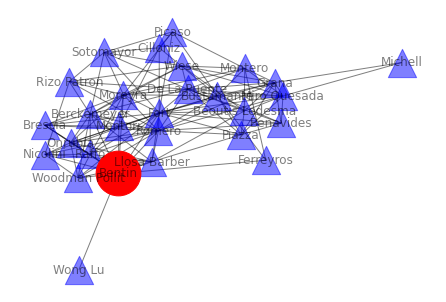

In [48]:
# saving the cut point
cut=list(net.articulation_points(EliteNet_giant))

# positions for all the nodes
pos=net.spring_layout(EliteNet_giant,k=0.5)

# sizes for nodes
SALIENT, NORMAL=(2000,800)

# plot all nodes
net.draw(EliteNet_giant,pos,node_color='b',node_size=NORMAL,with_labels=True, alpha=0.5,node_shape='^')

# make the cut salient:
net.draw_networkx_nodes(EliteNet_giant,pos,nodelist=cut,node_size=SALIENT,node_color='r')
plt.show()

_____

<a id='part3'></a>
## 3. Exporting the Data

In [49]:
net.write_graphml(EliteNet, "EliteNetP.graphml",encoding='utf-8')
net.write_gexf(EliteNet, "EliteNetP.gexf",encoding='utf-8')

____

* [Go to Course schedule](https://evansdatascience.github.io/GovernanceAnalytics/)